# Forcast Car Residual Value Using Recurrent Neural Network
_**Part2: Forcast the next 12 months!**_

---

---


## Part 1 - Data Preprocessing

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = 3
# Importing the training set
dataset_train = pd.read_csv('/Users/meliu/Downloads/Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(N, 99):
    X_train.append(training_set_scaled[i-N:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Part 2 - Building the RNN

In [3]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 24)


Using TensorFlow backend.


Epoch 1/100
96/96 [==============================] - 3s 32ms/step - loss: 0.2055
Epoch 2/100
96/96 [==============================] - 0s 626us/step - loss: 0.1782
Epoch 3/100
96/96 [==============================] - 0s 602us/step - loss: 0.1452
Epoch 4/100
96/96 [==============================] - 0s 604us/step - loss: 0.1027
Epoch 5/100
96/96 [==============================] - 0s 614us/step - loss: 0.0684
Epoch 6/100
96/96 [==============================] - 0s 601us/step - loss: 0.0451
Epoch 7/100
96/96 [==============================] - 0s 624us/step - loss: 0.0556
Epoch 8/100
96/96 [==============================] - 0s 682us/step - loss: 0.0517
Epoch 9/100
96/96 [==============================] - 0s 658us/step - loss: 0.0401
Epoch 10/100
96/96 [==============================] - 0s 638us/step - loss: 0.0398
Epoch 11/100
96/96 [==============================] - 0s 645us/step - loss: 0.0347
Epoch 12/100
96/96 [==============================] - 0s 665us/step - loss: 0.0264
Epoch 13/100
9

96/96 [==============================] - 0s 556us/step - loss: 0.0054
Epoch 100/100
96/96 [==============================] - 0s 575us/step - loss: 0.0048


## Part 3 - Making the predictions and visualising the results

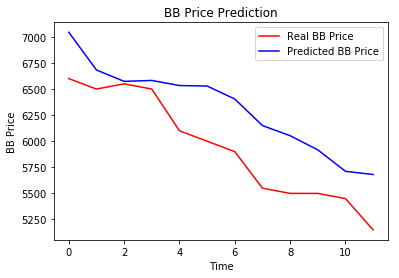

In [4]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Test.csv')
real_BB_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['BB_avg_value'], dataset_test['BB_avg_value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - N:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(N, N+12):
    X_test.append(inputs[i-N:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_BB_price = regressor.predict(X_test)
predicted_BB_price = sc.inverse_transform(predicted_BB_price)

# Visualising the results
plt.plot(real_BB_price, color = 'red', label = 'Real BB Price')
plt.plot(predicted_BB_price, color = 'blue', label = 'Predicted BB Price')
plt.title('BB Price Prediction')
plt.xlabel('Time')
plt.ylabel('BB Price')
plt.legend()
plt.show()